# Cat vs Dog 

## Convolutional Neural Network (CNN) in Keras
### Objectives
- how to read images
- how to design a simple convolutional neural network
- how to train and evaluate the model

## Data preparation

Read all the images with their corresponding labels. For labels, we will follow Kaggle's convention of dog = 1 and cat = 0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from PIL import Image
import tqdm
import keras
%matplotlib inline

keras.__version__, np.__version__

Using TensorFlow backend.


('2.0.6', '1.13.1')

In [2]:
IMG_DIR = "./train/"
IM_WIDTH = 128
IM_HEIGHT = 128

In [3]:
def read_images(directory, resize_to=(128, 128)):
    """
    Returns a tuple of images, labels
    """
    files = glob.glob(directory + "*.jpg")
    images = []
    labels = []
    for f in tqdm.tqdm_notebook(files):
        im = Image.open(f)
        im = im.resize(resize_to)
        im = np.array(im) / 255.0
        im = im.astype('float32')
        images.append(im)
        
        label = 1 if "dog" in f.lower() else 0
        labels.append(label)
        
    return np.array(images), np.array(labels)

In [4]:
X, y = read_images(directory=IMG_DIR, resize_to=(IM_WIDTH, IM_HEIGHT))
assert len(X) == len(y) == 25000

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
del X
del y

In [6]:
X_train.shape, X_test.shape

((17500, 128, 128, 3), (7500, 128, 128, 3))

In [7]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8, 8))

    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i])
        sp.set_title(labels[i])
    plt.show()
    
def humanize_labels(labels):
    """
    Converts numeric labels to human friendly string labels
    :param labels numpy array of int
    :returns numpy array of human friendly labels
    """
    return np.where(labels == 1, "dog", "cat")

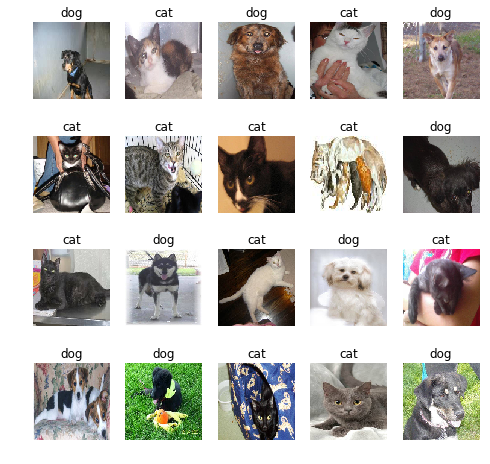

In [8]:
plot_images(X_train[:20], humanize_labels(y_train[:20]))

## Build model

In [16]:
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, Flatten
from keras.models import Model

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
x = Conv2D(filters=32, kernel_size=7, strides=2, padding="same")(input_layer)
x = Activation("relu")(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(64)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = Dense(1)(x)
x = Activation("sigmoid")(x)

model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        4736      
_________________________________________________________________
activation_13 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
__________

In [20]:
model.fit(X_train, y=y_train, batch_size=64, epochs=2)

Epoch 1/2
17500/17500 [==============================] - 61s - loss: 0.4151 - acc: 0.8105    
Epoch 2/2
17500/17500 [==============================] - 63s - loss: 0.3155 - acc: 0.8666    


## Evaluate model

In [21]:
model.evaluate(X_test, y_test, batch_size=128)

7500/7500 [==============================] - 19s    


[0.6698560108820597, 0.69573333346048993]

In [22]:
model.metrics_names

['loss', 'acc']